<a href="https://colab.research.google.com/github/sunhuanhuan920/ECE1512_2023F_ProjectRepo_Zhenhuan_Sun/blob/main/Project%20A/Project_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Task 1: Knowledge Distillation in MNIST Dataset**

**Load Dataset**

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 256
NUM_EPOCHS = 12
NUM_CLASSES = 10  # 10 total classes.

# Define the transform to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensors
])

# Load the MNIST train and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 101275973.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32908365.61it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32012976.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5137683.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



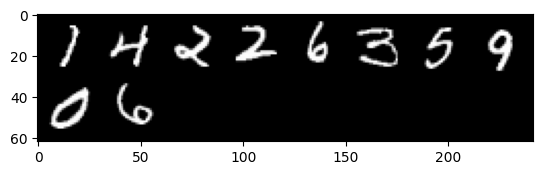

Labels:     1     4     2     2     6     3     5     9     0     6


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Function to display a batch of images and labels
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display the images and labels
num_samples_to_display = 10
imshow(torchvision.utils.make_grid(images[:num_samples_to_display]))
print('Labels:', ' '.join('%5s' % labels[j].item() for j in range(num_samples_to_display)))

# **Task 2: Knowledge Distillation in MHIST Dataset**